# HELP International

## Objective

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Problem Statement

Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Data Loading

In [2]:
# read the dataset
country_data = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Inspection

In [3]:
# basics of the country_data
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None of the columns have inconsistent datatype, hence no conversion is required.

In [4]:
country_data.shape

(167, 10)

In [5]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Cleaning

In [6]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No NULL values are observed.

In [7]:
#Checking if any columns having unique value ie only 1 value
unique =country_data.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

No unique value

In [8]:
#checking duplicates
sum(country_data.duplicated(subset = 'country')) == 0

True

No duplicate values

In [9]:
#Looking for spelling mistakes
print(country_data['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There is no spelling mistake.




As Health , Imports and Exports are % wrt to GDP per capita , as percentage wise will not give ample results we should convert them into values

In [10]:
country_data['exports'] = (country_data['exports']*country_data['gdpp'])/100
country_data['health'] = (country_data['health']*country_data['gdpp'])/100
country_data['imports'] = (country_data['imports']*country_data['gdpp'])/100
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analytics

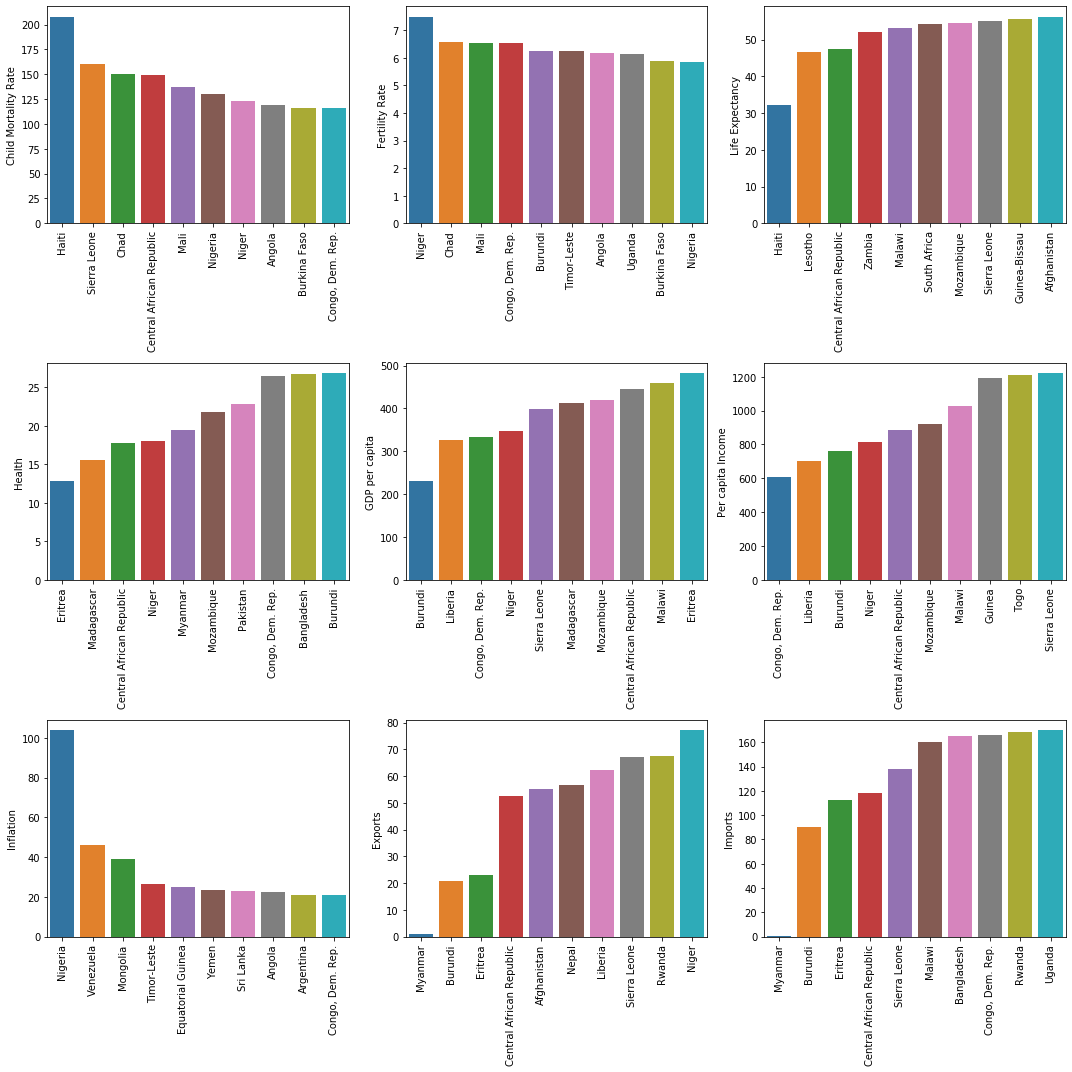

In [11]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = country_data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = country_data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = country_data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = country_data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = country_data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = country_data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = country_data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = country_data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = country_data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

#### Bivariate Analysis

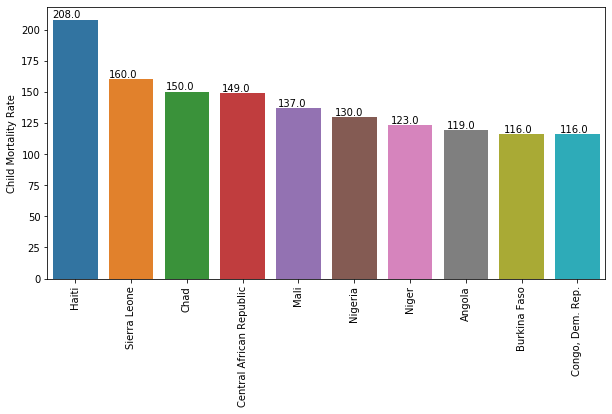

In [12]:
## to check Top 10 Highest Child Mortality Rated Countries
plt.figure(figsize = (10,5))
child_mort_top10 = country_data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

We can notice that Haiti Stands First having highest Child Mortality Rate

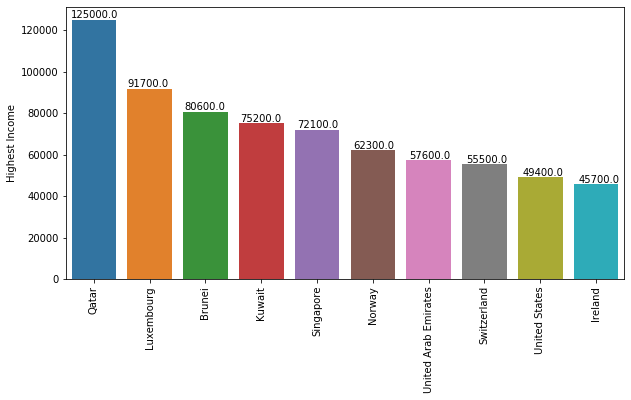

In [13]:
## countries having highest netincome per person 
plt.figure(figsize = (10,5))
child_income_top10 = country_data[['country','income']].sort_values('income', ascending = False).head(10)
ax = sns.barplot(x='country', y='income',data= child_income_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Highest Income')
plt.xticks(rotation=90)
plt.show()

Qatar Having Highest Net income per person

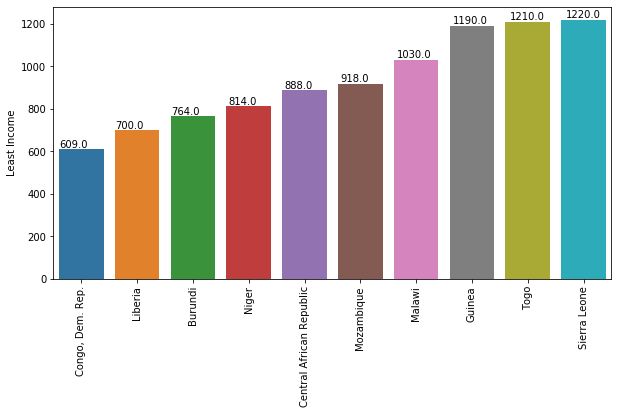

In [14]:
### countries having least net income per person 
plt.figure(figsize = (10,5))
child_income_least10 = country_data[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= child_income_least10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Least Income')
plt.xticks(rotation=90)
plt.show()

- We can see that these are Top 10 poor countries having least net income per person
- There are some countries like Congo, Dem.republic , Niger , Sierra Leone having Highest child mortality rate and least netincome per person. These states that they cant afford for medical aid

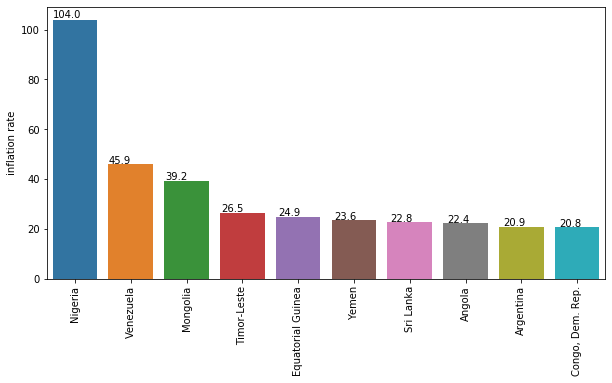

In [15]:
### to check the inflation rate
plt.figure(figsize = (10,5))
child_inflation = country_data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= child_inflation)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'inflation rate')
plt.xticks(rotation=90)
plt.show()

- As we can see that some of poor countries which having low net income has higher inflation rate which raises the cost of living results in uncertainity of life.
- As nigeria inflation is very high which indicates the higher difficulty for survival

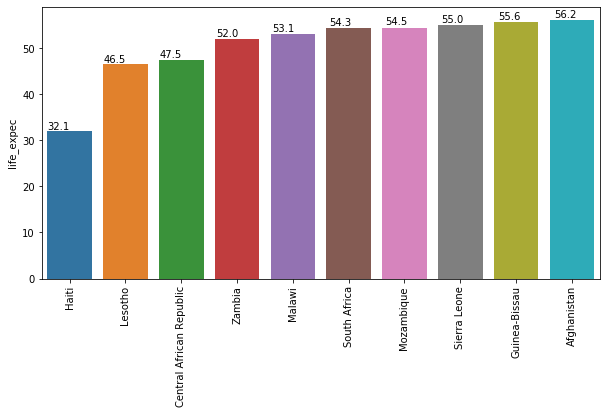

In [16]:
## to check life expectation rate
plt.figure(figsize = (10,5))
child_inflation = country_data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= child_inflation)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'life_expec')
plt.xticks(rotation=90)
plt.show()

Haiti is life expectancy is very very less as higher child mortality rate as higher deaths of children occured due to poor health conditions , need more medical aid for this country

#### Multivariate Analysis

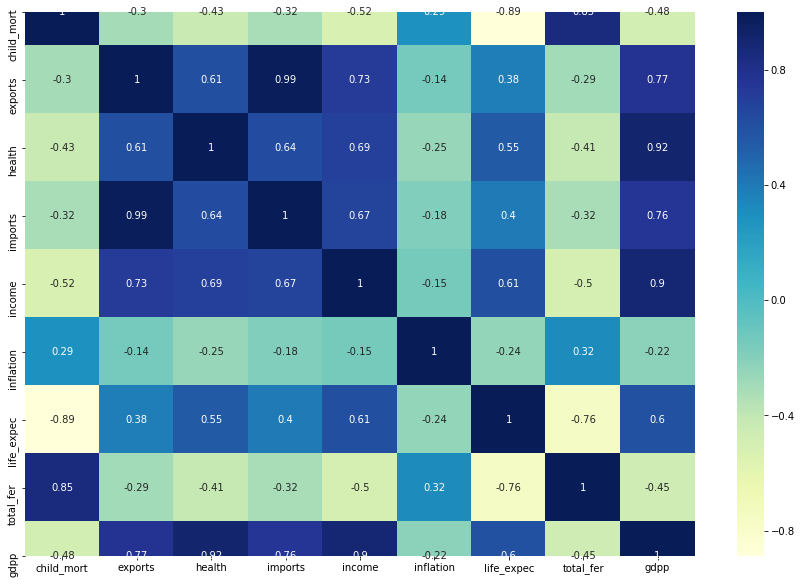

In [17]:
# Heatmap to understand the attributes dependency

# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (15,10))  
sns.heatmap(country_data.corr(),annot = True,cmap="YlGnBu")

- Exports are highly correlated with Imports
- Gdpp is highly correlated with health
- Child mortality rate is negatively correlated with Life Expectancy

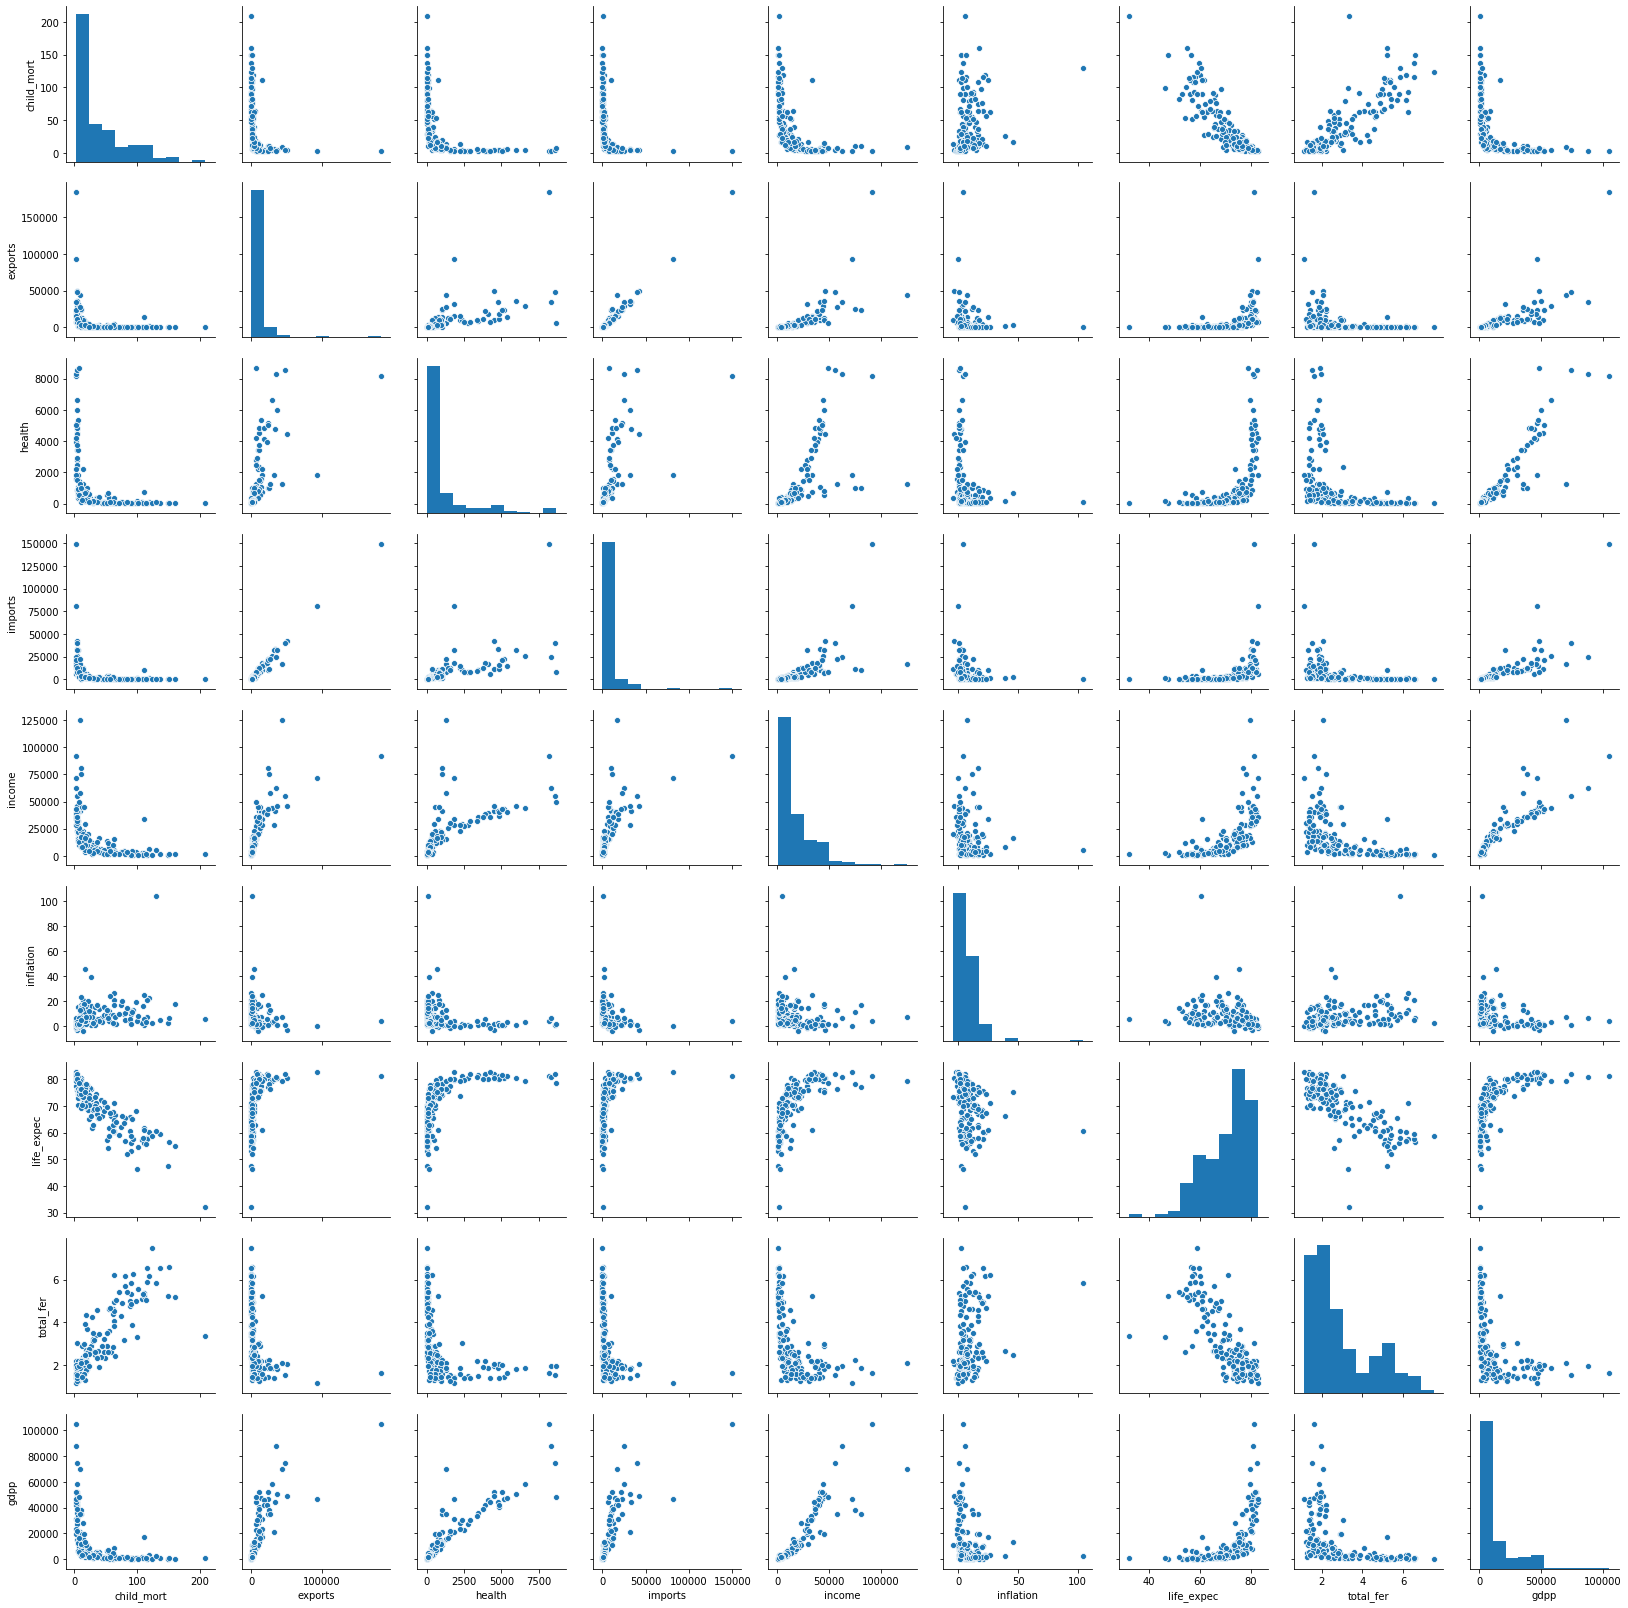

In [18]:
# Pairplot of all numeric columns
sns.pairplot(country_data)

### Checking Outliers

In [19]:
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


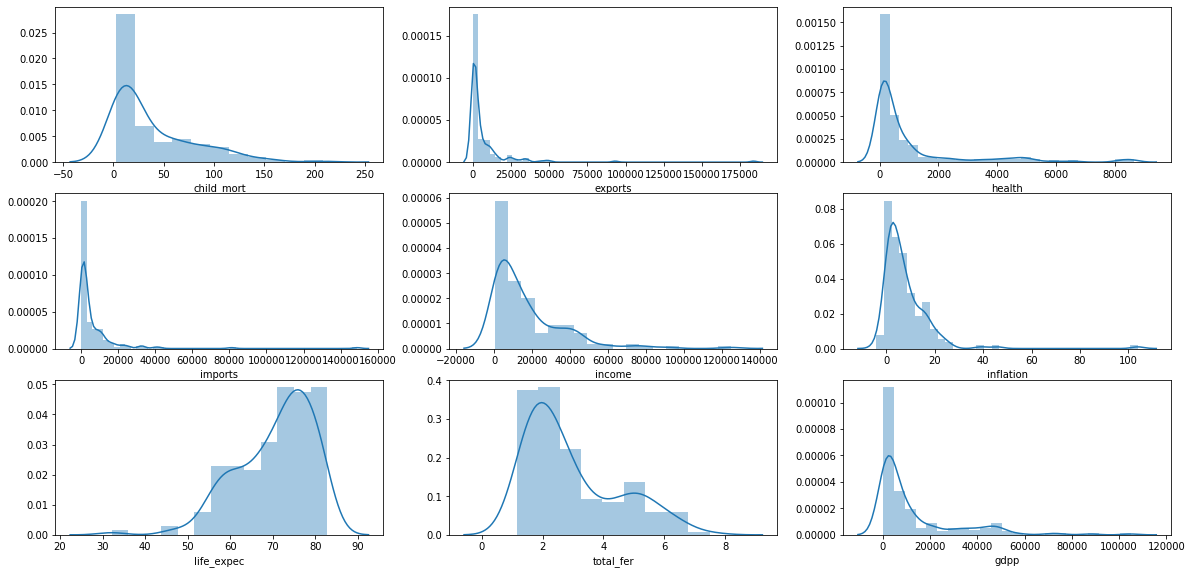

In [20]:
plt.figure(figsize = (20,20))

feature = country_data.columns[1::1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(country_data[i[1]])

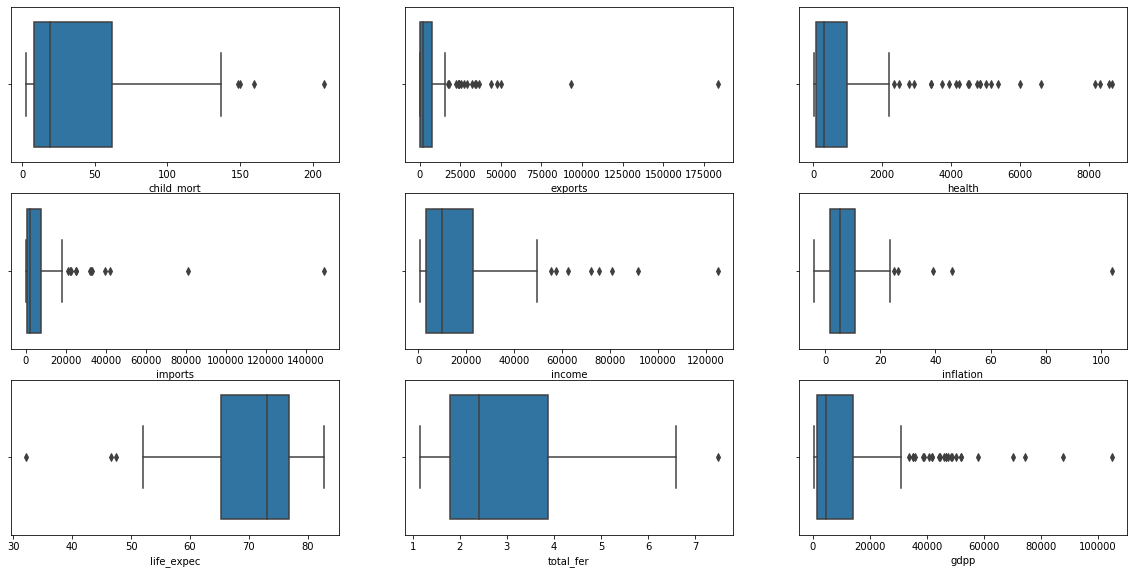

In [21]:
plt.figure(figsize = (20,20))

feature = country_data.columns[1::1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.boxplot(country_data[i[1]])

From these we can observe that outliers are present
- Child mortality has outliers at higher side we cant ignore the outliers . if we remove the outliers we end up loosing some countries having actual aid
- Life_expec has outliers at lower side we cant ignore the outliers
- Inflation has outliers at higher side we cant ignore the outliers

So we should leave the outliers for Child Mortality, Life_Expectation and inflation
Remaining we can cap the outliers

In [22]:
# As we can see there are a number of outliers in the data.

# Keeping in mind we need to identify backward countries based on socio economic and health factors.
# We will cap the outliers to values accordingly for analysis.

percentiles = country_data['child_mort'].quantile([0.01,0.99]).values
country_data['child_mort'][country_data['child_mort'] <= percentiles[0]] = percentiles[0]
country_data['child_mort'][country_data['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['health'].quantile([0.01,0.99]).values
country_data['health'][country_data['health'] <= percentiles[0]] = percentiles[0]
country_data['health'][country_data['health'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['life_expec'].quantile([0.01,0.99]).values
country_data['life_expec'][country_data['life_expec'] <= percentiles[0]] = percentiles[0]
country_data['life_expec'][country_data['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['total_fer'].quantile([0.01,0.99]).values
country_data['total_fer'][country_data['total_fer'] <= percentiles[0]] = percentiles[0]
country_data['total_fer'][country_data['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['income'].quantile([0.01,0.99]).values
country_data['income'][country_data['income'] <= percentiles[0]] = percentiles[0]
country_data['income'][country_data['income'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['inflation'].quantile([0.01,0.99]).values
country_data['inflation'][country_data['inflation'] <= percentiles[0]] = percentiles[0]
country_data['inflation'][country_data['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['gdpp'].quantile([0.01,0.99]).values
country_data['gdpp'][country_data['gdpp'] <= percentiles[0]] = percentiles[0]
country_data['gdpp'][country_data['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['imports'].quantile([0.01,0.99]).values
country_data['imports'][country_data['imports'] <= percentiles[0]] = percentiles[0]
country_data['imports'][country_data['imports'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['exports'].quantile([0.01,0.99]).values
country_data['exports'][country_data['exports'] <= percentiles[0]] = percentiles[0]
country_data['exports'][country_data['exports'] >= percentiles[1]] = percentiles[1]

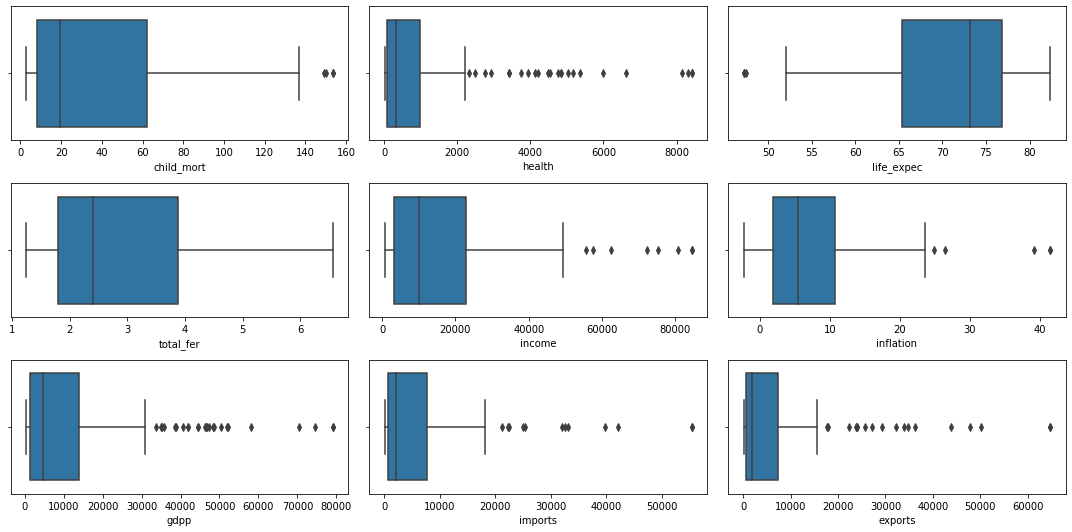

In [23]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(country_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_data['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_data['exports'], ax = axs[2,2])

plt.tight_layout()

## Clustering

To check the Clustering tendency, we use Hopkins Statistic Value 
If value is above 0.5 then it is ideal for clustering & value below 0.5 is not ideal

In [24]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(country_data.drop('country', axis = 1))

0.9128004568596583

The above score it can be said that it is good for clustering

#### Scaling 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
countrydata1 = scaler.fit_transform(country_data.drop('country',axis=1))

In [27]:
countrydata1 = pd.DataFrame(countrydata1, columns = country_data.columns[1::1])
countrydata1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


## K-Mean Clustering

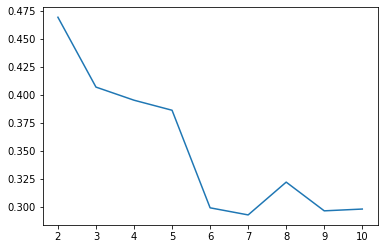

In [28]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countrydata1)
    ss.append([k, silhouette_score(countrydata1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1]);

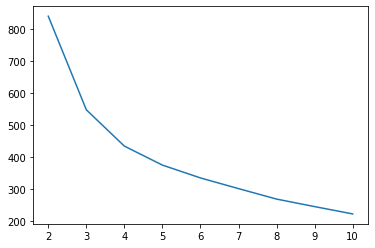

In [29]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(countrydata1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1]);

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countrydata1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countrydata1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880504
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.3864288935632213
For n_clusters=6, the silhouette score is 0.2995712221845505
For n_clusters=7, the silhouette score is 0.30206545676630064
For n_clusters=8, the silhouette score is 0.3253948045179314


We can see that optimal clusters is 3

In [31]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(countrydata1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [32]:
country_kmean = country_data

In [33]:
label  = pd.DataFrame(kmean.labels_, columns= ['cluster_id'])
label.head()

,cluster_id
0,1
1,2
2,2
3,1
4,2


In [34]:
country_kmean = pd.concat([country_kmean, label], axis =1)
country_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [35]:
country_kmean.cluster_id.value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

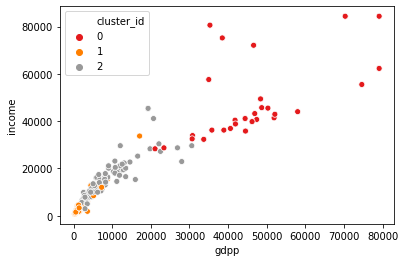

In [36]:
# scatter plot for gdpp, income and clusterId
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

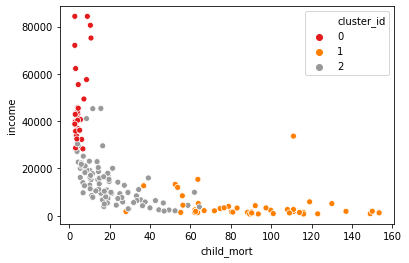

In [37]:
# scatter plot for Child_mort, income and clusterId
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

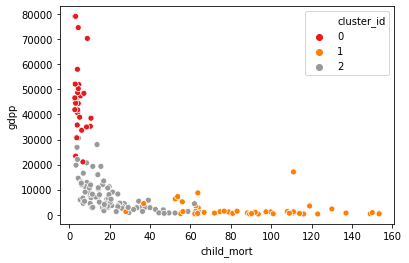

In [38]:
# scatter plot for Child_mort, gdpp and clusterId
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_id', data = country_kmean, palette = 'Set1');

### Cluster Profiling

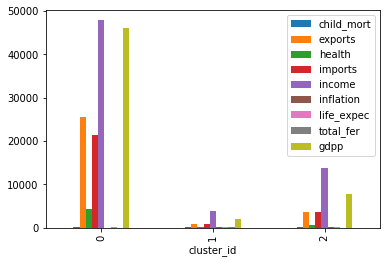

In [39]:
# Making sense out of the clusters
country_kmean.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

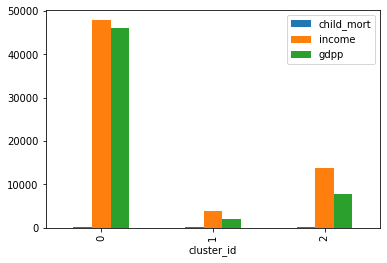

In [40]:
# gdpp, income and child_mort
country_kmean.drop(['country', 'exports', 'health', 'imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

In [41]:
child_mort_mean =pd.DataFrame(country_kmean.groupby(["cluster_id"]).child_mort.mean())
exports_mean= pd.DataFrame(country_kmean.groupby(["cluster_id"]).exports.mean())
health_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).health.mean())
imports_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).imports.mean())
income_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).income.mean())
inflat_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean = pd.DataFrame(country_kmean.groupby(["cluster_id"]).gdpp.mean())

In [42]:
country_analysis = pd.concat([pd.Series([0,1,2]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [43]:
country_analysis

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931
1,1,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
2,2,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778


In [44]:
country_analysis.columns = ["cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931
1,1,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
2,2,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778


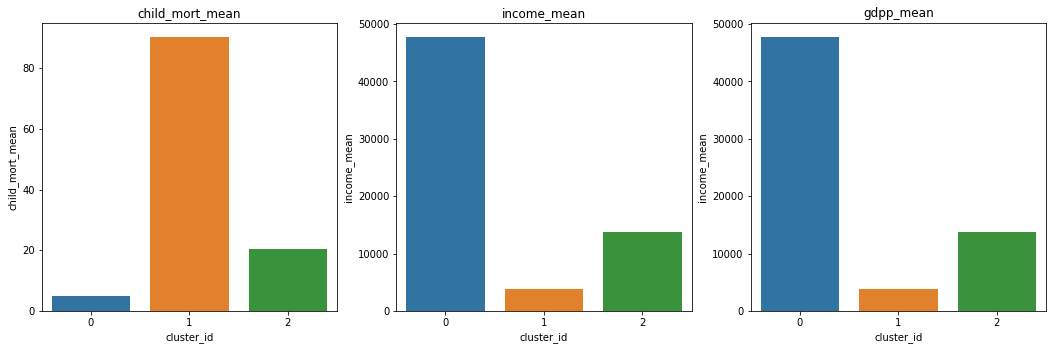

In [45]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis.cluster_id, country_analysis.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("income_mean")
sns.barplot(country_analysis.cluster_id, country_analysis.income_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("gdpp_mean")
sns.barplot(country_analysis.cluster_id, country_analysis.income_mean)

plt.show()

Looking at the graph we are certain that cluster 1 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. Lowest gdpp

In [46]:
country_analysis

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931
1,1,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833
2,2,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778


In [47]:
country_analysis.columns

Index(['cluster_id', 'child_mort_mean', 'exports_mean', 'health_mean',
       'imports_mean', 'income_mean', 'inflation_mean', 'life_expec_mean',
       'total_fer_mean', 'gdpp_mean'],
      dtype='object')

In [48]:
## so that retrieving Poor countries which need financial aid can be identified from cluster 1
cluster_kmean_final = country_kmean[country_kmean['cluster_id']==1]
cluster_kmean_final.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,1
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,1
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,1
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,1
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,1
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,1
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,1
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,1
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,1
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,1


### Top 10 Countries which are in need of  aid  are:
1. Liberia
2. Burundi
3. Congo,Dem.Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Hierachical Clustering

In [49]:
## importing necessary libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [50]:
countrydata1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [51]:
country_hc = country_data

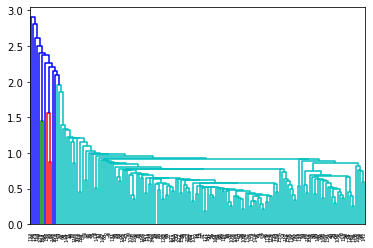

In [52]:
## single linkage
mergings = linkage(countrydata1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

It is difficult to identify from the single linkage

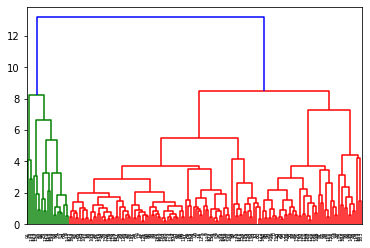

In [53]:
## complete linkage 
mergings = linkage(countrydata1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Cutting the Clusters vertically such that n_cluster = 3

In [54]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [55]:
# assign cluster labels
country_hc['cluster_labels'] = cluster_labels
country_hc.head()
country_hc.reset_index()

,index,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1
2,2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1
3,3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
4,4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,1
163,163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,1
165,165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


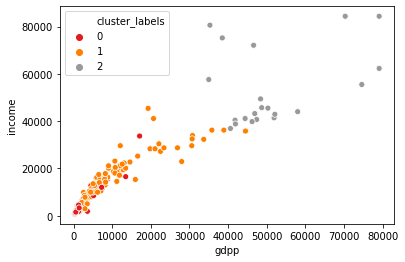

In [56]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = country_hc, palette = 'Set1');

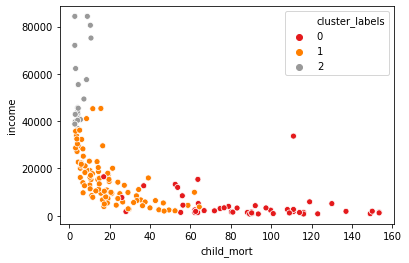

In [57]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = country_hc, palette = 'Set1');

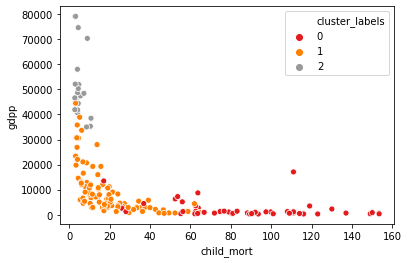

In [58]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = country_hc, palette = 'Set1');

### Cluster Profiling

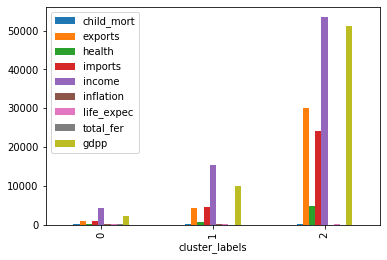

In [59]:
country_hc.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

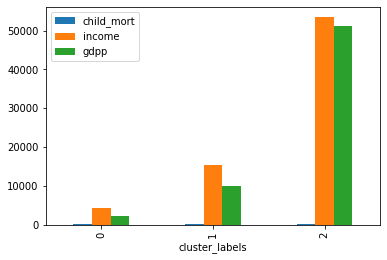

In [60]:
# gdpp, income and child_mort
country_hc.drop(['country', 'exports', 'health', 'imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

In [61]:
child_mort_mean =pd.DataFrame(country_hc.groupby(["cluster_labels"]).child_mort.mean())
exports_mean= pd.DataFrame(country_hc.groupby(["cluster_labels"]).exports.mean())
health_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).health.mean())
imports_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).imports.mean())
income_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).income.mean())
inflat_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).total_fer.mean())
gdpp_mean = pd.DataFrame(country_hc.groupby(["cluster_labels"]).gdpp.mean())

In [62]:
country_analysis_hc = pd.concat([pd.Series([0,1,2]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [63]:
country_analysis_hc


,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,87.586000,945.634750,126.481642,871.805773,4229.169600,11.797820,60.016400,4.875544,2157.944800
1,1,19.188542,4326.711618,733.089171,4474.111767,15438.333333,5.936460,74.069479,2.181075,9849.187500
2,2,5.176190,29964.696190,4731.309086,24182.246667,53421.333333,3.598248,80.298571,1.823962,51289.333333


In [64]:
country_analysis_hc.columns = ["cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_hc

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,87.586000,945.634750,126.481642,871.805773,4229.169600,11.797820,60.016400,4.875544,2157.944800
1,1,19.188542,4326.711618,733.089171,4474.111767,15438.333333,5.936460,74.069479,2.181075,9849.187500
2,2,5.176190,29964.696190,4731.309086,24182.246667,53421.333333,3.598248,80.298571,1.823962,51289.333333


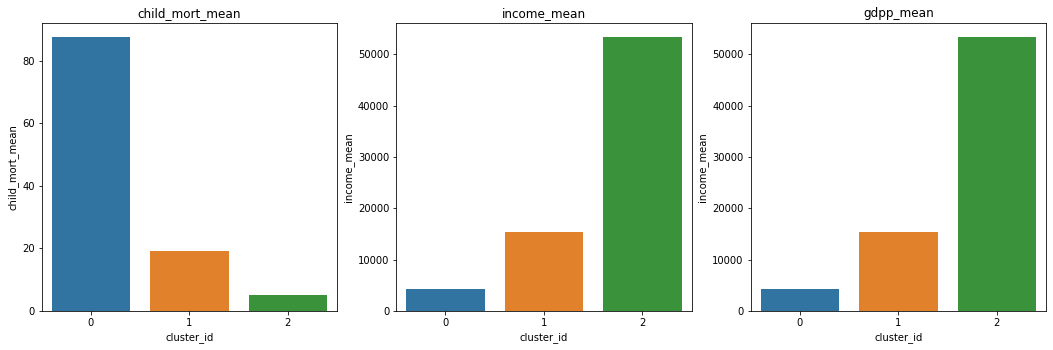

In [65]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("income_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.income_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("gdpp_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.income_mean)

plt.show()

Looking at the graph we are certain that Cluster 0 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. Lowest gdpp

In [66]:
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [67]:
## so that retrieving Poor countries which need financial aid can be identified from cluster 0
cluster_kmean = country_hc[country_hc['cluster_labels']==0]
cluster_kmean.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0
132,Sierra Leone,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0
31,Central African Republic,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,0
94,Malawi,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
50,Eritrea,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,0


### Top 10 Countries which are in need of  aid  are:
1. Liberia
2. Burundi
3. Congo,Dem.Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Final Result

We got same countries by both K-means and Hierarchical Clustering: 
Therefore following top 5 countries which are in direst need of aid by considering socio–economic factor into consideration:

1. Liberia
2. Burundi
3. Congo,Dem.Rep
4. Niger
5. Sierra Leone
